#### 분명 도미인데 빙어라고 예측하는 수상한 도미값이 발생
- 문제해결을 위해서 데이터를 적절하게 스케일하기(데이터전처리)

In [1]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [2]:
import numpy as np

In [3]:
# 모델을 학습할 데이터를 만들기
fish_data = np.column_stack((fish_length,fish_weight))  # 피쳐데이터
# column_stack 함수 : 튜플의 원소 각각을 한 열로 만들어 붙임 (연결할 리스트는 튜플 자료형으로 전달)
print(fish_data[:5])
fish_target = np.concatenate((np.ones(35),np.zeros(14))) # 타겟데이터
# concatenate 함수 : 각각의 데이터를 일렬로 연결함(한 행), (마찬가지로 튜플 자료형으로 전달)
print(fish_target)

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [4]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42) # train_test_split의 반환값: 훈련인풋, 훈련타겟, 테스트인풋, 테스트타겟
print(train_input.shape, test_target.shape)
print(train_target.shape, test_target.shape)

(36, 2) (13,)
(36,) (13,)


In [5]:
print(test_target) # 출력값결과 약간의 샘플링편향이 존재(전체-2.5:1,test-3.3:1)

train_input, test_input, train_target, test_target = train_test_split(fish_data,fish_target,stratify = fish_target, random_state = 42)
# stratify 매개변수: 타겟데이터를 전달하면 클래스 비율에 맞게 데이터를 나눈다
print(test_target) # 2.25:1 ==> 전체데이터가 작아서 약간의 오차가 존재

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


In [6]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [7]:
print(kn.predict([[25,150]]))  # 도미를 빙어라고 예측함

[0.]


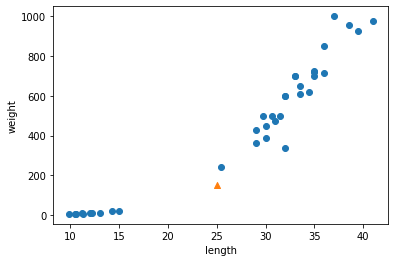

In [8]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150,marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]
[[21 33 19 30  1]]



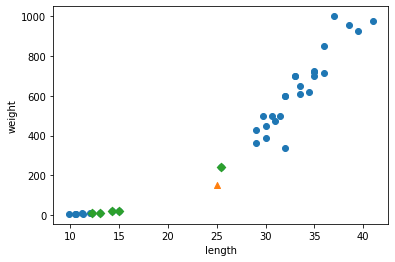

In [9]:
distances, indexes = kn.kneighbors([[25,150]]) # kneighbors의 반환값 : 가장 가까운 5개의 거리와 인덱스
print(distances)
print(indexes)
print()

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25,150,marker='^')
plt.scatter(train_input[indexes,0],train_input[indexes,1],marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
# 4개의 빙어와 1개의 도미가 가장 가까운 데이터로 나온다.(도미를 빙어로 예측)
# 그래프상으로는 도미들이 더 가까워 보인다. 
print()

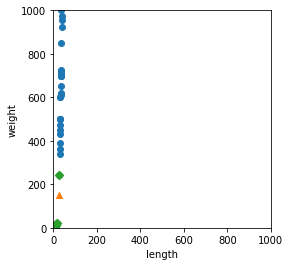

In [10]:
# 그래프에 나타난 거리의 비율이 이상하다.(x특성과 y특성의 스케일이 다르기 떼문)
fig = plt.figure()
ax = fig.add_subplot(111)

plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150,marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1],marker='D')  # 가장 가까운 5개의 값은 다른 모양의 점을 찍기
plt.xlim(0,1000)                              # xlim : x축의 범위를 정하는 함수
plt.ylim(0,1000)
plt.xlabel('length')
plt.ylabel('weight')

ax.set_aspect('equal', adjustable='box')      # 더 정확한 스케일을 위해서 정사각형 그래프를 그리기 위한 코드

plt.show()
# 각 축의 스케일을 맞춰주니 가장 가까운 값이 도미라는 것을 알 수 있다.(지금 생선의 길이는 거의 영향을 미치지 않고 무게만 영향을 미친다는 것을 알 수 있다.)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]



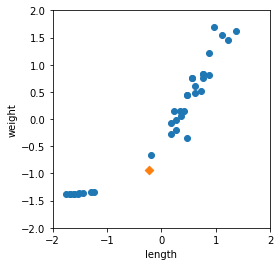

In [11]:
# 표준점수(z 점수)를 통해 데이터전처리 하기
# 분산 : 데이터에서 평균을 뺀 값을 모두 제곱한 다음 평균을 낸 값
# 표준편차 : 분산의 제곱근
# 표준점수 : 데이터가 원점에서 몇 표준편차만큼 떨어져 있는 지를 나타내는 값

fig = plt.figure()
ax = fig.add_subplot(111)

mean = np.mean(train_input, axis=0)  # mean : axis = 0 (매개변수axis가 행방향) 방향으로 평균을 구하는 함수
std = np.std(train_input, axis = 0)  # std : 행방향으로 표준편차를 구하는 함수
print(mean,std)
print()

train_scaled = (train_input - mean)/std # 표준점수를 만들어서 x,y값 스케일하기
new = [25,150]                          # 수상한 도미값

new_scaled = (new-mean)/std                   # 훈련데이터와 마찬가지로 예측하고자 하는 피쳐, 테스트 값도 훈련데이터로 스케일 해주기
test_scaled = (test_input - mean) / std


plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(new_scaled[0],new_scaled[1],marker='D')
plt.xlabel('length')
plt.ylabel("weight")
plt.xlim(-2,2)
plt.ylim(-2,2)
ax.set_aspect('equal', adjustable='box') 

plt.show()
# x,y가 서로 같은 범위으로 스케일 되었고, 길이가 완전히 같은 정사각형 
# 이제 육안으로 보는 그래프의 가까운 값과 k이웃알고리즘이 선정한 가까운 값이 같다
# 길이가 이전보다 이웃선정에 많은 영향을 미친다.


In [12]:
kn_scaled = KNeighborsClassifier()                # 새로운 객체생성
kn_scaled.fit(train_scaled,train_target)          # 새로운 데이터로 모델학습
print(kn_scaled.score(test_scaled,test_target))   
print()
print(kn_scaled.predict([new_scaled]))                  # 인풋값은 2차원
# 데이터 전처리를 해주었더니 똑바로 된 예측값이 나왔다.

1.0

[1.]


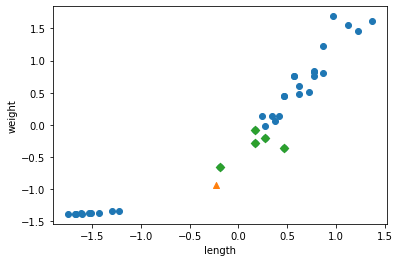

In [13]:
distances, indexes = kn_scaled.kneighbors([new_scaled])
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new_scaled[0],new_scaled[1],marker = '^')
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1],marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
# 수상한 값에 가장 가까운 샘플 5개는 이제 모두 도미이다. => 좋은 데이터 전처리가 됨

### 지금까지 배운 모델의 score을 높이는 방법
- 훈련세트와 테스트세트 샘플링편향을 조심
- 훈련 모델을 적절하게 선택(k-최근접이웃모델)
- 데이터전처리(스케일)